In [5]:
import anndata
import pandas as pd
import scanpy as sc
import numpy as np

###### hca immune cell atlas

In [ ]:
## cell annotations from suppoimental of https://www.sciencedirect.com/science/article/pii/S0301472X18308051

In [25]:
adata = sc.read_loom('/home/estorrs/data/single_cell_classification/hca/census_of_immune_cells/cc95ff89-2e68-4a08-a234-480eca21ce79.homo_sapiens.loom')
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 782859 × 58347
    obs: 'analysis_protocol.protocol_core.protocol_id', 'analysis_protocol.provenance.document_id', 'analysis_working_group_approval_status', 'barcode', 'bundle_uuid', 'bundle_version', 'cell_suspension.genus_species.ontology', 'cell_suspension.genus_species.ontology_label', 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_parts_label', 'derived_organ_parts_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'donor_organism.is_living', 'donor_organism.provenance.document_id', 'donor_organism.sex', 'dss_bundle_fqid', 'emptydrops_is_cell', 'file_uuid', 'file_version', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_prepara

In [68]:
'58b6d8e3-42d8-4227-9ed6-5ffca5dded0a' in adata.obs['bundle_uuid']

False

In [27]:
adata.obs

,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,library_preparation_protocol.strand,project.project_core.project_short_name,project.project_core.project_title,project.provenance.document_id,specimen_from_organism.organ.ontology,specimen_from_organism.organ.ontology_label,specimen_from_organism.organ_parts.ontology,specimen_from_organism.organ_parts.ontology_label,specimen_from_organism.provenance.document_id,total_umis
0000892fbc276097f396352e3f2a4b51,optimus_v1.3.2,f952e62d-ee06-493c-8b99-9b1d8eedb1e1,blessed,GGTGCGTAGCAGCCTC,680be01e-4fb2-4f5d-b5b5-8c04aa1654a3,2019-07-31T041756.446899Z,NCBITaxon:9606,Homo sapiens,35ca1574-a285-46a4-8ef0-89ce96fda8bf,immune system,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,3cf9c262-c873-4dbc-a2aa-5fba82a36b17,1009.0
0000e539a7dfe057f8013c9f5081b369,optimus_v1.3.2,3a91fec3-ddf8-4774-a5b4-a4f7eeec7bad,blessed,GAAATGAGTGAGTATA,786b8020-2876-45e2-bab1-ed421fb41bb5,2019-07-31T044950.692741Z,NCBITaxon:9606,Homo sapiens,5fb62c73-0d5a-4ad2-86a5-63aea54a7a4a,immune system,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,e97fef5c-b04f-41ba-b976-1df371a31bb3,1258.0
000142a0499aecd716932f5c475e1d51,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,ACAGCCGTCTGGAGCC,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,immune system,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,6245351e-d3b3-4311-b759-2e1d8f19ee74,2517.0
0002078f929f37ffa735bd59379e35f7,optimus_v1.3.2,f293f1b5-81e1-4a8a-ad5b-5d2b4c6576fd,blessed,AGATCTGCAATGTTGC,c29319ac-d35f-4912-8498-fc52de235726,2019-07-31T042633.116168Z,NCBITaxon:9606,Homo sapiens,7faf923e-8fdc-4e1e-9131-70d2ae38756b,immune system,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,b55fbaef-b9bf-4691-9568-8c91434bfd34,3440.0
0002c6543dd6e2ecc2f370e1897770d5,optimus_v1.3.2,48864612-3210-47f7-848f-919959b840ec,blessed,CAGCTAACAGTACACT,c1e3439d-2e88-4e64-aa50-91ef43597d2d,2019-07-31T042637.664902Z,NCBITaxon:9606,Homo sapiens,55bf1138-2dcc-45d7-b63b-db9943181b35,blood,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0000178,blood,UBERON:0012168,umbilical cord blood,1ff44a9d-106d-4dcb-bd48-143bf4f3d588,4110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd4ff0f06ebdb378e8bf970c262bb5,optimus_v1.3.2,da1d88aa-afbe-4b2c-9674-1e605946a7b0,blessed,TCGTACCTCTGTCTCG,a74f91b9-7e37-4fc7-83a8-cdcd39fca548,2019-07-31T043208.412263Z,NCBITaxon:9606,Homo sapiens,8e9bb3e7-611e-4883-a77a-98c0f4fbf3db,immune system,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,c2b0803b-3c71-491b-bd6f-092e140411fe,368.0
fffe24f9671bdd2019331f15ad73893e,optimus_v1.3.2,f98e3c48-aba4-4dcb-9a99-6d8048de1957,blessed,ACTGAGTCATGGAATA,60459ec6-b1ec-41db-a4e3-1340e85c76b3,2019-07-31T051746.769241Z,NCBITaxon:9606,Homo sapiens,9a640709-0dad-4db5-aa8f-a36de75e2c63,blood,...,first,1M Immune Cells,Census of Immune Cells,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0000178,blood,UBERON:0012168,umbilical cord blood,9959d424-8eb3-4c7d-802d-fbac4168b85d,467.0
fffe7fb70df2c18839a0247692aa3073,optimus_v1.3.2,ea1bed3a-19c3-4536-8475-6e1cac995e2b,blessed,TCACAAGTCTGGCGTG,710df317-8a20-4ee6-a199-8fd8ec1220a5,2019-07-31T041634.852391Z,NCBITax

In [34]:
adata.obs.iloc[0]

analysis_protocol.protocol_core.protocol_id                                                                   optimus_v1.3.2
analysis_protocol.provenance.document_id                                                f952e62d-ee06-493c-8b99-9b1d8eedb1e1
analysis_working_group_approval_status                                                                               blessed
barcode                                                                                                     GGTGCGTAGCAGCCTC
bundle_uuid                                                                             680be01e-4fb2-4f5d-b5b5-8c04aa1654a3
bundle_version                                                                                     2019-07-31T041756.446899Z
cell_suspension.genus_species.ontology                                                                        NCBITaxon:9606
cell_suspension.genus_species.ontology_label                                                                    Homo sapiens


In [26]:
metadata = pd.read_csv('./data/scRNAseq/immune/hca_immune_annotations.txt', sep='\t')
metadata

,Cell,Cluster #,Cluster Name,Donor
0,MantonBM1_HiSeq_2-TACAGTGCACCAACCG-1.BM1,1,CD34+ pre-B,BM1
1,MantonBM1_HiSeq_3-CAACCTCCACAAGCCC-1.BM1,1,CD34+ pre-B,BM1
2,MantonBM1_HiSeq_4-GGACAAGAGAAACCTA-1.BM1,1,CD34+ pre-B,BM1
3,MantonBM1_HiSeq_4-ATCATCTGTTCTCATT-1.BM1,1,CD34+ pre-B,BM1
4,MantonBM1_HiSeq_7-AGTGAGGTCCTATGTT-1.BM1,1,CD34+ pre-B,BM1
...,...,...,...,...
101930,MantonBM8_HiSeq_4-AGAGCTTTCTCTGAGA-1.BM8,35,Plasma Cell,BM8
101931,MantonBM8_HiSeq_5-CCTTCCCTCTTCCTTC-1.BM8,35,Plasma Cell,BM8
101932,MantonBM8_HiSeq_2-TGGTTAGCACGCATCG-1.BM8,35,Plasma Cell,BM8
101933,MantonBM8_HiSeq_4-TAAGCGTTCCACGTTC-1.BM8,35,Plasma Cell,BM8


In [29]:
barcodes = {x.split('-')[1] for x in metadata['Cell']}
len(barcodes)


95285

In [38]:
common = barcodes.intersection(set(adata.obs['barcode']))
len(common)

95285

In [40]:
# mask = [True if c in common else False for c in adata.obs['barcode']]
# filtered = adata[mask]
# filtered

In [41]:
from collections import Counter
Counter(metadata['Cluster Name']).most_common()

[('Naive T-cell', 25266),
 ('Neutrophil', 12216),
 ('Erythroblast', 8226),
 ('Immature-Neutrophil', 7981),
 ('Follicular B cell', 6041),
 ('CD8 T-cell', 5283),
 ('NK cells', 5123),
 ('Dendritic Cell', 4131),
 ('Eosinophil', 3804),
 ('Monocyte', 3531),
 ('Early-Erythroblast', 2685),
 ('Plasma Cell', 1906),
 ('CD34+ HSC', 1886),
 ('Pro-B', 1882),
 ('CD34+ MultiLin', 1620),
 ('CD34+ Gran', 1151),
 ('CD34+ ERP', 1138),
 ('Granulocytic-UNK', 1093),
 ('Pre-Dendritic', 973),
 ('CD34+ pre-PC', 821),
 ('CD34+ pre-B', 743),
 ('CD34+ pre-B cycling', 728),
 ('CD34+ ERP-Early', 722),
 ('CD34+ MKP', 404),
 ('CD34+ HSC-cycle', 390),
 ('CD34+ LMPP', 368),
 ('CD34+ Lymphoid UNK', 348),
 ('CD34+ MEP', 341),
 ('CD34+ CLP', 308),
 ('CD34+ MDP-2', 191),
 ('CD34+ MDP-1', 188),
 ('Stromal', 181),
 ('CD34+ Eo/B/Mast', 119),
 ('CD34+ pre-T', 82),
 ('Platelet', 65)]

In [43]:
adata.var

,Accession,chromosome,featureend,featurekey,featurestart,featuretype,genus_species,isgene,n_cells
TSPAN6,ENSG00000000003,chrX,100639991,ENSG00000000003,100627109,protein_coding,Homo sapiens,1,2237
DPM1,ENSG00000000419,chr20,50958555,ENSG00000000419,50934867,protein_coding,Homo sapiens,1,77890
SCYL3,ENSG00000000457,chr1,169894267,ENSG00000000457,169849631,protein_coding,Homo sapiens,1,9261
C1orf112,ENSG00000000460,chr1,169854080,ENSG00000000460,169662007,protein_coding,Homo sapiens,1,7216
FGR,ENSG00000000938,chr1,27635277,ENSG00000000938,27612064,protein_coding,Homo sapiens,1,49392
...,...,...,...,...,...,...,...,...,...
AL358472.5,ENSG00000284738,chr1,153935240,ENSG00000284738,153923337,antisense_RNA,Homo sapiens,1,3288
AL645728.2,ENSG00000284740,chr1,1509452,ENSG00000284740,1503250,transcribed_unprocessed_pseudogene,Homo sapiens,1,1169
AL591163.1,ENSG00000284744,chr1,6770038,ENSG00000284744,6767954,lincRNA,Homo sapiens,1,419
AL034417.4,ENSG00000284747,chr1,8005312,ENSG00000284747,7991134,antisense_RNA,Homo sapiens,1,757


In [44]:
adata.var_names_make_unique()

/home/estorrs/miniconda3/envs/rds_converion/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1']
  + str(example_colliding_values)


In [46]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [47]:
adata.shape

(668396, 40551)

In [48]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'analysis_protocol.protocol_core.protocol_id' as categorical
... storing 'analysis_protocol.provenance.document_id' as categorical
... storing 'analysis_working_group_approval_status' as categorical
... storing 'barcode' as categorical
... storing 'bundle_uuid' as categorical
... storing 'bundle_version' as categorical
... storing 'cell_suspension.genus_species.ontology' as categorical
... storing 'cell_suspension.genus_species.ontology_label' as categorical
... storing 'cell_suspension.provenance.document_id' as categorical
... storing 'derived_organ_label' as categorical
... storing 'derived_organ_ontology' as categorical
... storing 'derived_organ_parts_label' as categorical
... storing 'derived_organ_parts_ontology' as categorical
... storing 'donor_organism.development_stage.ontology' as categorical
... storing 'donor_organism.development_stage.ontology_label' as categorical
... storing 'donor_organism.diseases.ontology' as categorical
... storing 'donor_organism.disea

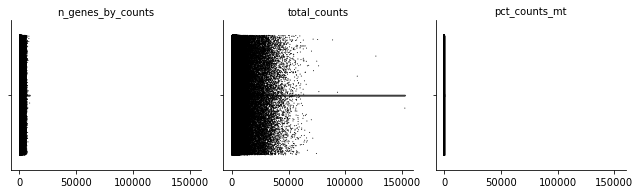

In [49]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

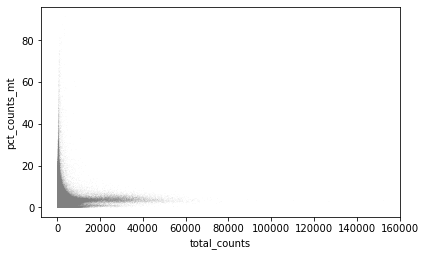

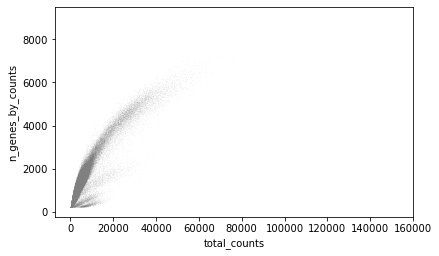

In [50]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [51]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [52]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/estorrs/miniconda3/envs/rds_converion/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [53]:
adata

AnnData object with n_obs × n_vars = 508569 × 40551
    obs: 'analysis_protocol.protocol_core.protocol_id', 'analysis_protocol.provenance.document_id', 'analysis_working_group_approval_status', 'barcode', 'bundle_uuid', 'bundle_version', 'cell_suspension.genus_species.ontology', 'cell_suspension.genus_species.ontology_label', 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_parts_label', 'derived_organ_parts_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'donor_organism.is_living', 'donor_organism.provenance.document_id', 'donor_organism.sex', 'dss_bundle_fqid', 'emptydrops_is_cell', 'file_uuid', 'file_version', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_prepara

In [54]:
sc.pp.log1p(adata)

In [55]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [56]:
adata.raw = adata

In [57]:
adata = adata[:, adata.var.highly_variable]

In [58]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [59]:
sc.pp.scale(adata)

In [60]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

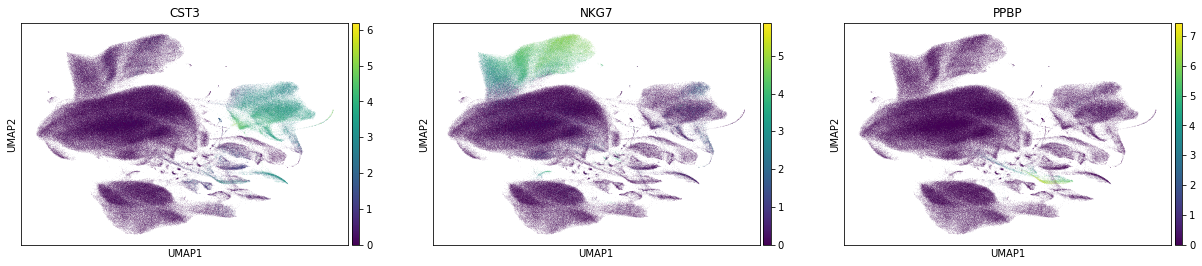

In [61]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

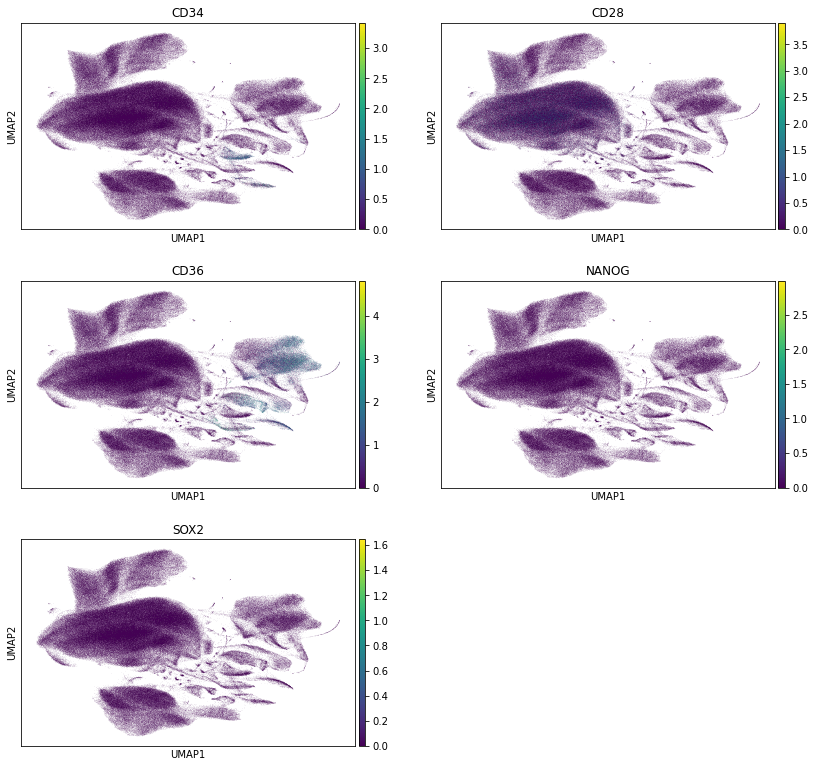

In [64]:
sc.pl.umap(adata, color=['CD34', 'CD28', 'CD36', 'NANOG', 'SOX2'], ncols=2)

In [65]:
hca_metadata = pd.read_csv('./data/scRNAseq/immune/1M Immune Cells 2020-11-22 06.06.tsv',
                          sep='\t')
hca_metadata

,analysis_file.file_core.format,analysis_file.provenance.document_id,analysis_process.analysis_run_type,analysis_process.input_bundles,analysis_process.inputs.parameter_name,analysis_process.inputs.parameter_value,analysis_process.provenance.document_id,analysis_process.reference_bundle,analysis_process.tasks.cpus,analysis_process.tasks.disk_size,...,specimen_from_organism.genus_species.ontology_label,specimen_from_organism.genus_species.text,specimen_from_organism.organ.ontology,specimen_from_organism.organ.ontology_label,specimen_from_organism.organ.text,specimen_from_organism.organ_parts.ontology,specimen_from_organism.organ_parts.ontology_label,specimen_from_organism.organ_parts.text,specimen_from_organism.provenance.document_id,specimen_from_organism.purchased_specimen.manufacturer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0002405,immune system,immune system,UBERON:0002371,bone marrow,bone marrow,f9ba0b1c-c053-4371-9b6e-76717fd47b11,Stem Cell Technologies
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0002405,immune system,immune system,UBERON:0002371,bone marrow,bone marrow,f9ba0b1c-c053-4371-9b6e-76717fd47b11,Stem Cell Technologies
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0002405,immune system,immune system,UBERON:0002371,bone marrow,bone marrow,f9ba0b1c-c053-4371-9b6e-76717fd47b11,Stem Cell Technologies
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0002405,immune system,immune system,UBERON:0002371,bone marrow,bone marrow,f9ba0b1c-c053-4371-9b6e-76717fd47b11,Stem Cell Technologies
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0002405,immune system,immune system,UBERON:0002371,bone marrow,bone marrow,f9ba0b1c-c053-4371-9b6e-76717fd47b11,Stem Cell Technologies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0000178,blood,blood,UBERON:0012168,umbilical cord blood,umbilical cord blood,7a25e55c-d2b9-45f2-a501-0de54a41be76,Stem Cell Technologies
2409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0000178,blood,blood,UBERON:0012168,umbilical cord blood,umbilical cord blood,7a25e55c-d2b9-45f2-a501-0de54a41be76,Stem Cell Technologies
2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0000178,blood,blood,UBERON:0012168,umbilical cord blood,umbilical cord blood,7a25e55c-d2b9-45f2-a501-0de54a41be76,Stem Cell Technologies
2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Homo sapiens,Homo sapiens,UBERON:0000178,blood,blood,UBERON:0012168,umbilical cord blood,umbilical cord blood,7a25e55c-d2b9-45f2-a501-0de54a41be76,Stem Cell Technologies


In [128]:
list(hca_metadata.columns)

['analysis_file.file_core.format',
 'analysis_file.provenance.document_id',
 'analysis_process.analysis_run_type',
 'analysis_process.input_bundles',
 'analysis_process.inputs.parameter_name',
 'analysis_process.inputs.parameter_value',
 'analysis_process.provenance.document_id',
 'analysis_process.reference_bundle',
 'analysis_process.tasks.cpus',
 'analysis_process.tasks.disk_size',
 'analysis_process.tasks.docker_image',
 'analysis_process.tasks.log_err',
 'analysis_process.tasks.log_out',
 'analysis_process.tasks.memory',
 'analysis_process.tasks.start_time',
 'analysis_process.tasks.stop_time',
 'analysis_process.tasks.task_name',
 'analysis_process.tasks.zone',
 'analysis_process.timestamp_start_utc',
 'analysis_process.timestamp_stop_utc',
 'analysis_process.type.text',
 'analysis_protocol.computational_method',
 'analysis_protocol.provenance.document_id',
 'analysis_protocol.type.text',
 'bundle_uuid',
 'bundle_version',
 'cell_suspension.biomaterial_core.ncbi_taxon_id',
 'cell

In [66]:
hca_metadata['file_name']

0       MantonBM2_HiSeq_7_S15_L005_I1_001.fastq.gz
1       MantonBM2_HiSeq_7_S15_L005_R1_001.fastq.gz
2       MantonBM2_HiSeq_7_S15_L005_R2_001.fastq.gz
3       MantonBM2_HiSeq_7_S15_L006_I1_001.fastq.gz
4       MantonBM2_HiSeq_7_S15_L006_R1_001.fastq.gz
                           ...                    
2408     MantonCB5_HiSeq_3_S3_L001_R1_001.fastq.gz
2409     MantonCB5_HiSeq_3_S3_L001_R2_001.fastq.gz
2410     MantonCB5_HiSeq_3_S3_L002_I1_001.fastq.gz
2411     MantonCB5_HiSeq_3_S3_L002_R1_001.fastq.gz
2412     MantonCB5_HiSeq_3_S3_L002_R2_001.fastq.gz
Name: file_name, Length: 2413, dtype: object

In [129]:
d2l = {d:'_'.join(l.split('_')[:3]) for d, l in zip(hca_metadata['bundle_uuid'],
                          hca_metadata['file_name']) if 'Manton' in l}
# d2l = {d:l.split('_')[0] for d, l in zip(hca_metadata['donor_organism.provenance.document_id'],
#                           hca_metadata['file_name'])}

In [130]:
adata.obs['sample_id'] = [d2l[x] for x in adata.obs['bundle_uuid']]
adata.obs

,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,specimen_from_organism.provenance.document_id,total_umis,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample_id,prep_id,cell_id
MantonBM4_HiSeq_3-GAAATGAGTGAGTATA-1.BM4,optimus_v1.3.2,3a91fec3-ddf8-4774-a5b4-a4f7eeec7bad,blessed,GAAATGAGTGAGTATA,786b8020-2876-45e2-bab1-ed421fb41bb5,2019-07-31T044950.692741Z,NCBITaxon:9606,Homo sapiens,5fb62c73-0d5a-4ad2-86a5-63aea54a7a4a,immune system,...,e97fef5c-b04f-41ba-b976-1df371a31bb3,1258.0,517,517,1258.0,35.0,2.782194,MantonBM4_HiSeq_5,BM4,MantonBM4_HiSeq_3-GAAATGAGTGAGTATA-1.BM4
MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4,optimus_v1.3.2,f293f1b5-81e1-4a8a-ad5b-5d2b4c6576fd,blessed,AGATCTGCAATGTTGC,c29319ac-d35f-4912-8498-fc52de235726,2019-07-31T042633.116168Z,NCBITaxon:9606,Homo sapiens,7faf923e-8fdc-4e1e-9131-70d2ae38756b,immune system,...,b55fbaef-b9bf-4691-9568-8c91434bfd34,3440.0,923,923,3440.0,90.0,2.616279,MantonBM4_HiSeq_3,BM4,MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4
MantonCB6_HiSeq_5-CAGCTAACAGTACACT-1.CB6,optimus_v1.3.2,48864612-3210-47f7-848f-919959b840ec,blessed,CAGCTAACAGTACACT,c1e3439d-2e88-4e64-aa50-91ef43597d2d,2019-07-31T042637.664902Z,NCBITaxon:9606,Homo sapiens,55bf1138-2dcc-45d7-b63b-db9943181b35,blood,...,1ff44a9d-106d-4dcb-bd48-143bf4f3d588,4110.0,1101,1101,4110.0,101.0,2.457421,MantonCB6_HiSeq_6,CB6,MantonCB6_HiSeq_5-CAGCTAACAGTACACT-1.CB6
MantonBM1_HiSeq_6-CCTAAAGAGGAGTCTG-1.BM1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,CCTAAAGAGGAGTCTG,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,immune system,...,6245351e-d3b3-4311-b759-2e1d8f19ee74,1309.0,682,682,1309.0,34.0,2.597403,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_6-CCTAAAGAGGAGTCTG-1.BM1
MantonCB4_HiSeq_5-AGATTGCCATTAGGCT-1.CB4,optimus_v1.3.2,4b28a586-bbf9-402f-a38f-4af47b9fb9bd,blessed,AGATTGCCATTAGGCT,03674b44-eac9-45b0-9251-20b43e97f022,2019-07-31T044922.293804Z,NCBITaxon:9606,Homo sapiens,d5877f63-12cb-4b90-a171-b173d15ca237,blood,...,7627fea0-9f23-42ef-88c3-fe4b9df51d8c,3476.0,857,857,3476.0,56.0,1.611047,MantonCB4_HiSeq_1,CB4,MantonCB4_HiSeq_5-AGATTGCCATTAGGCT-1.CB4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1,optimus_v1.3.2,833514db-5a3d-4e9d-8a9b-d5b1992163c9,blessed,ATCCGAAAGTATGACA,f8b2b231-bf29-4e7a-9757-81656beb2da0,2019-07-31T050629.109072Z,NCBITaxon:9606,Homo sapiens,bc708932-6606-4e88-90a3-071876e4315b,immune system,...,ed281945-6106-4a90-afc1-80e964f77693,3298.0,927,927,3298.0,96.0,2.910855,MantonBM1_HiSeq_6,BM1,MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1
MantonCB2_HiSeq_6-CAAGTTGTCATACGGT-1.CB2,optimus_v1.3.2,26ad1756-3d17-4eeb-bea5-c93bcbffbfa8,blessed,CAAGTTGTCATACGGT,d6c10ad0-edc4-4dbe-bfef-f023c82febf2,2019-07-31T045522.925552Z,NCBITaxon:9606,Homo sapiens,6f8e813f-2df8-46eb-af7d-285e314efa7b,blood,...,fba5b5bd-1901-4934-903e-c34af0c558dd,4901.0,1174,1174,4901.0,98.0,1.999592,MantonCB2_HiSeq_7,CB2,MantonCB2_HiSeq_6-CAAGTTGTCATACGGT-1.CB2
MantonBM4_HiSeq_3-AGCAGCCAGGCTCAGA-1.BM4,optimus_v1.3.2,d7bc7b2b-fdb9-4221-b817-f8cfaf219095,blessed,AGCAGCCAGGCTCAGA,af96cbc7-d43f-48b4-8d67-3d5f96503d38,2019-07-31T044641.288350Z,NCBITaxon:9606,Homo sapiens,2d6ae514-d572-4fd0-bee8-9fce0d62d03b,immune system,...,0824e9d4-37c6-43c8-a2b9-c0f3815f0036,2360.0,712,712,2360.0,51.0,2.161017,MantonBM4_HiSeq_1,BM4,MantonBM4_HiSeq_3-AGCAGCCAGGCTCAGA-1.BM4
MantonCB3_HiSeq_8-TCACAAGTCTGGCGTG-1.CB3,optimus_v1.3.2,ea1bed3a-19c3-4536-8475-6e1cac995e2b,blessed,TCACAAGTCTGGCGTG,710df317-8a20-4ee6-a199-8fd8ec1220a5,2019-07-31T041634.852391Z,NCBITaxon:9606,Homo sapiens,b4c51d48-3519-46a0-bbc6-cef586678604,blood,...,a8b6f46b-73d6-48

In [136]:

d2l = {d:l.split('_')[1] if isinstance(l, str) else l
       for d, l in zip(hca_metadata['bundle_uuid'],
                          hca_metadata['sequence_file.library_prep_id']) if not pd.isnull(l) if 'BM' in l}

In [137]:
adata.obs['prep_id'] = [d2l.get(x, '') for x in adata.obs['bundle_uuid']]
# adata.obs['prep_id'] = [d2l.get(x, '') for x in adata.obs['bundle_uuid']]
adata.obs

,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,specimen_from_organism.provenance.document_id,total_umis,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample_id,prep_id,cell_id
MantonBM4_HiSeq_3-GAAATGAGTGAGTATA-1.BM4,optimus_v1.3.2,3a91fec3-ddf8-4774-a5b4-a4f7eeec7bad,blessed,GAAATGAGTGAGTATA,786b8020-2876-45e2-bab1-ed421fb41bb5,2019-07-31T044950.692741Z,NCBITaxon:9606,Homo sapiens,5fb62c73-0d5a-4ad2-86a5-63aea54a7a4a,immune system,...,e97fef5c-b04f-41ba-b976-1df371a31bb3,1258.0,517,517,1258.0,35.0,2.782194,MantonBM4_HiSeq_5,BM4,MantonBM4_HiSeq_3-GAAATGAGTGAGTATA-1.BM4
MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4,optimus_v1.3.2,f293f1b5-81e1-4a8a-ad5b-5d2b4c6576fd,blessed,AGATCTGCAATGTTGC,c29319ac-d35f-4912-8498-fc52de235726,2019-07-31T042633.116168Z,NCBITaxon:9606,Homo sapiens,7faf923e-8fdc-4e1e-9131-70d2ae38756b,immune system,...,b55fbaef-b9bf-4691-9568-8c91434bfd34,3440.0,923,923,3440.0,90.0,2.616279,MantonBM4_HiSeq_3,BM4,MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4
MantonCB6_HiSeq_5-CAGCTAACAGTACACT-1.CB6,optimus_v1.3.2,48864612-3210-47f7-848f-919959b840ec,blessed,CAGCTAACAGTACACT,c1e3439d-2e88-4e64-aa50-91ef43597d2d,2019-07-31T042637.664902Z,NCBITaxon:9606,Homo sapiens,55bf1138-2dcc-45d7-b63b-db9943181b35,blood,...,1ff44a9d-106d-4dcb-bd48-143bf4f3d588,4110.0,1101,1101,4110.0,101.0,2.457421,MantonCB6_HiSeq_6,,MantonCB6_HiSeq_5-CAGCTAACAGTACACT-1.CB6
MantonBM1_HiSeq_6-CCTAAAGAGGAGTCTG-1.BM1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,CCTAAAGAGGAGTCTG,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,immune system,...,6245351e-d3b3-4311-b759-2e1d8f19ee74,1309.0,682,682,1309.0,34.0,2.597403,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_6-CCTAAAGAGGAGTCTG-1.BM1
MantonCB4_HiSeq_5-AGATTGCCATTAGGCT-1.CB4,optimus_v1.3.2,4b28a586-bbf9-402f-a38f-4af47b9fb9bd,blessed,AGATTGCCATTAGGCT,03674b44-eac9-45b0-9251-20b43e97f022,2019-07-31T044922.293804Z,NCBITaxon:9606,Homo sapiens,d5877f63-12cb-4b90-a171-b173d15ca237,blood,...,7627fea0-9f23-42ef-88c3-fe4b9df51d8c,3476.0,857,857,3476.0,56.0,1.611047,MantonCB4_HiSeq_1,,MantonCB4_HiSeq_5-AGATTGCCATTAGGCT-1.CB4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1,optimus_v1.3.2,833514db-5a3d-4e9d-8a9b-d5b1992163c9,blessed,ATCCGAAAGTATGACA,f8b2b231-bf29-4e7a-9757-81656beb2da0,2019-07-31T050629.109072Z,NCBITaxon:9606,Homo sapiens,bc708932-6606-4e88-90a3-071876e4315b,immune system,...,ed281945-6106-4a90-afc1-80e964f77693,3298.0,927,927,3298.0,96.0,2.910855,MantonBM1_HiSeq_6,BM1,MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1
MantonCB2_HiSeq_6-CAAGTTGTCATACGGT-1.CB2,optimus_v1.3.2,26ad1756-3d17-4eeb-bea5-c93bcbffbfa8,blessed,CAAGTTGTCATACGGT,d6c10ad0-edc4-4dbe-bfef-f023c82febf2,2019-07-31T045522.925552Z,NCBITaxon:9606,Homo sapiens,6f8e813f-2df8-46eb-af7d-285e314efa7b,blood,...,fba5b5bd-1901-4934-903e-c34af0c558dd,4901.0,1174,1174,4901.0,98.0,1.999592,MantonCB2_HiSeq_7,,MantonCB2_HiSeq_6-CAAGTTGTCATACGGT-1.CB2
MantonBM4_HiSeq_3-AGCAGCCAGGCTCAGA-1.BM4,optimus_v1.3.2,d7bc7b2b-fdb9-4221-b817-f8cfaf219095,blessed,AGCAGCCAGGCTCAGA,af96cbc7-d43f-48b4-8d67-3d5f96503d38,2019-07-31T044641.288350Z,NCBITaxon:9606,Homo sapiens,2d6ae514-d572-4fd0-bee8-9fce0d62d03b,immune system,...,0824e9d4-37c6-43c8-a2b9-c0f3815f0036,2360.0,712,712,2360.0,51.0,2.161017,MantonBM4_HiSeq_1,BM4,MantonBM4_HiSeq_3-AGCAGCCAGGCTCAGA-1.BM4
MantonCB3_HiSeq_8-TCACAAGTCTGGCGTG-1.CB3,optimus_v1.3.2,ea1bed3a-19c3-4536-8475-6e1cac995e2b,blessed,TCACAAGTCTGGCGTG,710df317-8a20-4ee6-a199-8fd8ec1220a5,2019-07-31T041634.852391Z,NCBITaxon:9606,Homo sapiens,b4c51d48-3519-46a0-bbc6-cef586678604,blood,...,a8b6f46b-73d6-48ba-b394-d

In [149]:
set([(x[:10], x[-3:]) for x in adata.obs['cell_id']])

{('MantonBM1_', 'BM1'),
 ('MantonBM2_', 'BM2'),
 ('MantonBM3_', 'BM3'),
 ('MantonBM4_', 'BM4'),
 ('MantonBM5_', 'BM5'),
 ('MantonBM6_', 'BM6'),
 ('MantonBM7_', 'BM7'),
 ('MantonBM8_', 'BM8'),
 ('MantonCB1_', '-1.'),
 ('MantonCB2_', '-1.'),
 ('MantonCB3_', '-1.'),
 ('MantonCB4_', '-1.'),
 ('MantonCB5_', '-1.'),
 ('MantonCB6_', '-1.'),
 ('MantonCB7_', '-1.'),
 ('MantonCB8_', '-1.')}

In [148]:
set([(x[:10], x[-3:]) for x in metadata['Cell']])

{('MantonBM1_', 'BM1'),
 ('MantonBM2_', 'BM2'),
 ('MantonBM3_', 'BM3'),
 ('MantonBM4_', 'BM4'),
 ('MantonBM5_', 'BM5'),
 ('MantonBM6_', 'BM6'),
 ('MantonBM7_', 'BM7'),
 ('MantonBM8_', 'BM8')}

... storing 'sample_id' as categorical


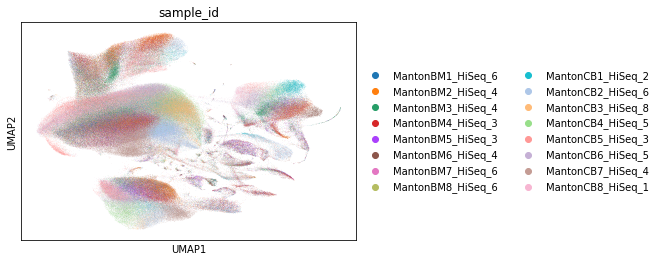

In [73]:
sc.pl.umap(adata, color=['sample_id'], ncols=2)

In [138]:
# build ids
adata.obs['cell_id'] = [f'{l}-{b}-1.{p}' for l, b, p in zip(adata.obs['sample_id'],
                                                             adata.obs['barcode'],
                                                            adata.obs['prep_id'])]
adata.obs

,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,specimen_from_organism.provenance.document_id,total_umis,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample_id,prep_id,cell_id
MantonBM4_HiSeq_3-GAAATGAGTGAGTATA-1.BM4,optimus_v1.3.2,3a91fec3-ddf8-4774-a5b4-a4f7eeec7bad,blessed,GAAATGAGTGAGTATA,786b8020-2876-45e2-bab1-ed421fb41bb5,2019-07-31T044950.692741Z,NCBITaxon:9606,Homo sapiens,5fb62c73-0d5a-4ad2-86a5-63aea54a7a4a,immune system,...,e97fef5c-b04f-41ba-b976-1df371a31bb3,1258.0,517,517,1258.0,35.0,2.782194,MantonBM4_HiSeq_5,BM4,MantonBM4_HiSeq_5-GAAATGAGTGAGTATA-1.BM4
MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4,optimus_v1.3.2,f293f1b5-81e1-4a8a-ad5b-5d2b4c6576fd,blessed,AGATCTGCAATGTTGC,c29319ac-d35f-4912-8498-fc52de235726,2019-07-31T042633.116168Z,NCBITaxon:9606,Homo sapiens,7faf923e-8fdc-4e1e-9131-70d2ae38756b,immune system,...,b55fbaef-b9bf-4691-9568-8c91434bfd34,3440.0,923,923,3440.0,90.0,2.616279,MantonBM4_HiSeq_3,BM4,MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4
MantonCB6_HiSeq_5-CAGCTAACAGTACACT-1.CB6,optimus_v1.3.2,48864612-3210-47f7-848f-919959b840ec,blessed,CAGCTAACAGTACACT,c1e3439d-2e88-4e64-aa50-91ef43597d2d,2019-07-31T042637.664902Z,NCBITaxon:9606,Homo sapiens,55bf1138-2dcc-45d7-b63b-db9943181b35,blood,...,1ff44a9d-106d-4dcb-bd48-143bf4f3d588,4110.0,1101,1101,4110.0,101.0,2.457421,MantonCB6_HiSeq_6,,MantonCB6_HiSeq_6-CAGCTAACAGTACACT-1.
MantonBM1_HiSeq_6-CCTAAAGAGGAGTCTG-1.BM1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,CCTAAAGAGGAGTCTG,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,immune system,...,6245351e-d3b3-4311-b759-2e1d8f19ee74,1309.0,682,682,1309.0,34.0,2.597403,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_1-CCTAAAGAGGAGTCTG-1.BM1
MantonCB4_HiSeq_5-AGATTGCCATTAGGCT-1.CB4,optimus_v1.3.2,4b28a586-bbf9-402f-a38f-4af47b9fb9bd,blessed,AGATTGCCATTAGGCT,03674b44-eac9-45b0-9251-20b43e97f022,2019-07-31T044922.293804Z,NCBITaxon:9606,Homo sapiens,d5877f63-12cb-4b90-a171-b173d15ca237,blood,...,7627fea0-9f23-42ef-88c3-fe4b9df51d8c,3476.0,857,857,3476.0,56.0,1.611047,MantonCB4_HiSeq_1,,MantonCB4_HiSeq_1-AGATTGCCATTAGGCT-1.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1,optimus_v1.3.2,833514db-5a3d-4e9d-8a9b-d5b1992163c9,blessed,ATCCGAAAGTATGACA,f8b2b231-bf29-4e7a-9757-81656beb2da0,2019-07-31T050629.109072Z,NCBITaxon:9606,Homo sapiens,bc708932-6606-4e88-90a3-071876e4315b,immune system,...,ed281945-6106-4a90-afc1-80e964f77693,3298.0,927,927,3298.0,96.0,2.910855,MantonBM1_HiSeq_6,BM1,MantonBM1_HiSeq_6-ATCCGAAAGTATGACA-1.BM1
MantonCB2_HiSeq_6-CAAGTTGTCATACGGT-1.CB2,optimus_v1.3.2,26ad1756-3d17-4eeb-bea5-c93bcbffbfa8,blessed,CAAGTTGTCATACGGT,d6c10ad0-edc4-4dbe-bfef-f023c82febf2,2019-07-31T045522.925552Z,NCBITaxon:9606,Homo sapiens,6f8e813f-2df8-46eb-af7d-285e314efa7b,blood,...,fba5b5bd-1901-4934-903e-c34af0c558dd,4901.0,1174,1174,4901.0,98.0,1.999592,MantonCB2_HiSeq_7,,MantonCB2_HiSeq_7-CAAGTTGTCATACGGT-1.
MantonBM4_HiSeq_3-AGCAGCCAGGCTCAGA-1.BM4,optimus_v1.3.2,d7bc7b2b-fdb9-4221-b817-f8cfaf219095,blessed,AGCAGCCAGGCTCAGA,af96cbc7-d43f-48b4-8d67-3d5f96503d38,2019-07-31T044641.288350Z,NCBITaxon:9606,Homo sapiens,2d6ae514-d572-4fd0-bee8-9fce0d62d03b,immune system,...,0824e9d4-37c6-43c8-a2b9-c0f3815f0036,2360.0,712,712,2360.0,51.0,2.161017,MantonBM4_HiSeq_1,BM4,MantonBM4_HiSeq_1-AGCAGCCAGGCTCAGA-1.BM4
MantonCB3_HiSeq_8-TCACAAGTCTGGCGTG-1.CB3,optimus_v1.3.2,ea1bed3a-19c3-4536-8475-6e1cac995e2b,blessed,TCACAAGTCTGGCGTG,710df317-8a20-4ee6-a199-8fd8ec1220a5,2019-07-31T041634.852391Z,NCBITaxon:9606,Homo sapiens,b4c51d48-3519-46a0-bbc6-cef586678604,blood,...,a8b6f46b-73d6-48ba-b394-dc879bde50

In [139]:
len(set(adata.obs.index))

498966

In [140]:
# ls = metadata['Cell'].to_list()
# import re
# ls = [x[:10] + x[:] for x in ls]
# ls[:10]

In [141]:
common = set(adata.obs['cell_id'].to_list()).intersection(set(metadata['Cell'].to_list()))
len(common)

69421

In [150]:
# common

In [151]:
# adata.obs

In [152]:
adata.obs.index = adata.obs['cell_id'].to_list()
mask = [True if c in common else False for c in adata.obs.index]
filtered = adata[mask]
filtered

View of AnnData object with n_obs × n_vars = 69421 × 3000
    obs: 'analysis_protocol.protocol_core.protocol_id', 'analysis_protocol.provenance.document_id', 'analysis_working_group_approval_status', 'barcode', 'bundle_uuid', 'bundle_version', 'cell_suspension.genus_species.ontology', 'cell_suspension.genus_species.ontology_label', 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_parts_label', 'derived_organ_parts_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'donor_organism.is_living', 'donor_organism.provenance.document_id', 'donor_organism.sex', 'dss_bundle_fqid', 'emptydrops_is_cell', 'file_uuid', 'file_version', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_p

In [153]:
filtered.obs = pd.merge(filtered.obs, metadata, left_index=True, right_on='Cell')
filtered.obs

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([72839, 63481], dtype='int64'), …


,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,total_counts,total_counts_mt,pct_counts_mt,sample_id,prep_id,cell_id,Cell,Cluster #,Cluster Name,Donor
72839,optimus_v1.3.2,33a88859-070f-42d2-b6d0-7c5272b437af,blessed,CGTTAGACAGCTTCGG,225606f5-af2a-4017-bd2e-810c60a5844c,2019-07-31T052657.500543Z,NCBITaxon:9606,Homo sapiens,fb858cba-58fd-4fb3-921a-cd7f57cee99d,immune system,...,3549.0,82.0,2.310510,MantonBM6_HiSeq_6,BM6,MantonBM6_HiSeq_6-CGTTAGACAGCTTCGG-1.BM6,MantonBM6_HiSeq_6-CGTTAGACAGCTTCGG-1.BM6,21,Naive T-cell,BM6
63481,optimus_v1.3.2,16aa949a-34aa-4a6a-bc45-112cc8b47f09,blessed,TCAGATGGTCATGCAT,a26b6435-e6e6-4bf0-bcc4-00403e27ad7a,2019-07-31T050417.584343Z,NCBITaxon:9606,Homo sapiens,b15d196c-5c27-4cd9-ad1c-28f7144030eb,immune system,...,3588.0,155.0,4.319955,MantonBM5_HiSeq_3,BM5,MantonBM5_HiSeq_3-TCAGATGGTCATGCAT-1.BM5,MantonBM5_HiSeq_3-TCAGATGGTCATGCAT-1.BM5,29,Eosinophil,BM5
84953,optimus_v1.3.2,9208e7fb-3ae5-48ce-a976-81d35d39ab1a,blessed,TGTTCCGGTCCGACGT,70acee1e-9212-49c0-85ff-d5159b8627c8,2019-07-31T042703.249650Z,NCBITaxon:9606,Homo sapiens,156a9db0-0f13-407e-ae78-9bb2e42586f9,immune system,...,2777.0,107.0,3.853079,MantonBM7_HiSeq_5,BM7,MantonBM7_HiSeq_5-TGTTCCGGTCCGACGT-1.BM7,MantonBM7_HiSeq_5-TGTTCCGGTCCGACGT-1.BM7,21,Naive T-cell,BM7
64495,optimus_v1.3.2,14c364b1-d90c-425b-b6ed-4a1949c8d811,blessed,TGAGCATAGCGTAGTG,fab59898-3db9-4647-b3af-9cda96836937,2019-07-31T050605.292142Z,NCBITaxon:9606,Homo sapiens,74795055-24d8-4f3b-9609-852203c1cc05,immune system,...,2772.0,118.0,4.256854,MantonBM5_HiSeq_2,BM5,MantonBM5_HiSeq_2-TGAGCATAGCGTAGTG-1.BM5,MantonBM5_HiSeq_2-TGAGCATAGCGTAGTG-1.BM5,30,Neutrophil,BM5
27372,optimus_v1.3.2,a9929cae-f352-4e1e-8aad-8442bd3609cb,blessed,AACTTTCTCGATAGAA,b155bcc6-5cbd-4434-9320-f6ec5ee0eb80,2019-07-31T045543.652269Z,NCBITaxon:9606,Homo sapiens,e4803873-4df7-4af9-accf-053667f133cc,immune system,...,8450.0,281.0,3.325444,MantonBM2_HiSeq_2,BM2,MantonBM2_HiSeq_2-AACTTTCTCGATAGAA-1.BM2,MantonBM2_HiSeq_2-AACTTTCTCGATAGAA-1.BM2,34,Dendritic Cell,BM2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,optimus_v1.3.2,f952e62d-ee06-493c-8b99-9b1d8eedb1e1,blessed,CGGGTCAAGCGTCAAG,680be01e-4fb2-4f5d-b5b5-8c04aa1654a3,2019-07-31T041756.446899Z,NCBITaxon:9606,Homo sapiens,35ca1574-a285-46a4-8ef0-89ce96fda8bf,immune system,...,3042.0,129.0,4.240631,MantonBM1_HiSeq_4,BM1,MantonBM1_HiSeq_4-CGGGTCAAGCGTCAAG-1.BM1,MantonBM1_HiSeq_4-CGGGTCAAGCGTCAAG-1.BM1,21,Naive T-cell,BM1
38334,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,AAATGCCTCTCACATT,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,immune system,...,3893.0,155.0,3.981505,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-AAATGCCTCTCACATT-1.BM3,MantonBM3_HiSeq_3-AAATGCCTCTCACATT-1.BM3,31,Immature-Neutrophil,BM3
68618,optimus_v1.3.2,33a88859-070f-42d2-b6d0-7c5272b437af,blessed,CGCGTTTTCTTTCCTC,225606f5-af2a-4017-bd2e-810c60a5844c,2019-07-31T052657.500543Z,NCBITaxon:9606,Homo sapiens,fb858cba-58fd-4fb3-921a-cd7f57cee99d,immune system,...,2823.0,0.0,0.000000,MantonBM6_HiSeq_6,BM6,MantonBM6_HiSeq_6-CGCGTTTTCTTTCCTC-1.BM6,MantonBM6_HiSeq_6-CGCGTTTTCTTTCCTC-1.BM6,14,CD34+ MKP,BM6
5103,optimus_v1.3.2,3d2e7cbc-15ce-4493-8165-a673cee48f86,blessed,AAGCCGCTCGCCATAA,10e3905b-34da-42f0-9d98-a6e523e150b6,2019-07-31T042259.715310Z,NCBITaxon:9606,Homo sapiens,f67a87aa-205d-4e2b-9f4f-caa8b5e1bf18,immune system,...,3496.0,105.0,3.003433,MantonBM1_HiSeq_3,BM1,MantonBM1_HiSeq_3-AAGCCGCTCGCCATAA-1.BM1,MantonBM1_HiSeq_3-AAGCCGCTCGCCATAA-1.BM1,21,Naive T-cell,BM1


... storing 'sample_id' as categorical
... storing 'prep_id' as categorical
... storing 'Cluster Name' as categorical
... storing 'Donor' as categorical


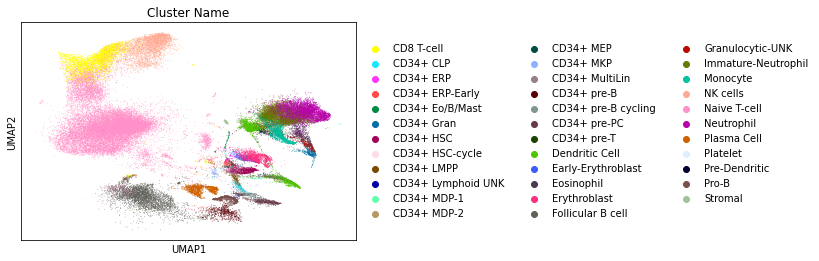

In [154]:
sc.pl.umap(filtered, color='Cluster Name')

In [155]:
# reread in the raw counts so you can add the raw counts layer
counts = sc.read_loom('/home/estorrs/data/single_cell_classification/hca/census_of_immune_cells/cc95ff89-2e68-4a08-a234-480eca21ce79.homo_sapiens.loom')
counts

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 782859 × 58347
    obs: 'analysis_protocol.protocol_core.protocol_id', 'analysis_protocol.provenance.document_id', 'analysis_working_group_approval_status', 'barcode', 'bundle_uuid', 'bundle_version', 'cell_suspension.genus_species.ontology', 'cell_suspension.genus_species.ontology_label', 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_parts_label', 'derived_organ_parts_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'donor_organism.is_living', 'donor_organism.provenance.document_id', 'donor_organism.sex', 'dss_bundle_fqid', 'emptydrops_is_cell', 'file_uuid', 'file_version', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_prepara

In [166]:
d2l = {d:'_'.join(l.split('_')[:3]) for d, l in zip(hca_metadata['bundle_uuid'],
                          hca_metadata['file_name']) if 'Manton' in l}
counts.obs['sample_id'] = [d2l[x] for x in counts.obs['bundle_uuid']]

d2l = {d:l.split('_')[1] if isinstance(l, str) else l
       for d, l in zip(hca_metadata['bundle_uuid'],
                          hca_metadata['sequence_file.library_prep_id']) if not pd.isnull(l)}
counts.obs['prep_id'] = [d2l.get(x, '') for x in counts.obs['bundle_uuid']]
counts.obs['cell_id'] = [f'{l}-{b}-1.{p}' for l, b, p in zip(counts.obs['sample_id'],
                                                             counts.obs['barcode'],
                                                            counts.obs['prep_id'])]
counts.obs

,analysis_protocol.protocol_core.protocol_id,analysis_protocol.provenance.document_id,analysis_working_group_approval_status,barcode,bundle_uuid,bundle_version,cell_suspension.genus_species.ontology,cell_suspension.genus_species.ontology_label,cell_suspension.provenance.document_id,derived_organ_label,...,project.provenance.document_id,specimen_from_organism.organ.ontology,specimen_from_organism.organ.ontology_label,specimen_from_organism.organ_parts.ontology,specimen_from_organism.organ_parts.ontology_label,specimen_from_organism.provenance.document_id,total_umis,sample_id,prep_id,cell_id
MantonBM1_HiSeq_4-GGTGCGTAGCAGCCTC-1.MantonBM1_HiSeq_4,optimus_v1.3.2,f952e62d-ee06-493c-8b99-9b1d8eedb1e1,blessed,GGTGCGTAGCAGCCTC,680be01e-4fb2-4f5d-b5b5-8c04aa1654a3,2019-07-31T041756.446899Z,NCBITaxon:9606,Homo sapiens,35ca1574-a285-46a4-8ef0-89ce96fda8bf,immune system,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,3cf9c262-c873-4dbc-a2aa-5fba82a36b17,1009.0,MantonBM1_HiSeq_4,BM1,MantonBM1_HiSeq_4-GGTGCGTAGCAGCCTC-1.BM1
MantonBM4_HiSeq_5-GAAATGAGTGAGTATA-1.MantonBM4_HiSeq_5,optimus_v1.3.2,3a91fec3-ddf8-4774-a5b4-a4f7eeec7bad,blessed,GAAATGAGTGAGTATA,786b8020-2876-45e2-bab1-ed421fb41bb5,2019-07-31T044950.692741Z,NCBITaxon:9606,Homo sapiens,5fb62c73-0d5a-4ad2-86a5-63aea54a7a4a,immune system,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,e97fef5c-b04f-41ba-b976-1df371a31bb3,1258.0,MantonBM4_HiSeq_5,BM4,MantonBM4_HiSeq_5-GAAATGAGTGAGTATA-1.BM4
MantonBM1_HiSeq_1-ACAGCCGTCTGGAGCC-1.MantonBM1_HiSeq_1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,ACAGCCGTCTGGAGCC,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,immune system,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,6245351e-d3b3-4311-b759-2e1d8f19ee74,2517.0,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_1-ACAGCCGTCTGGAGCC-1.BM1
MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.MantonBM4_HiSeq_3,optimus_v1.3.2,f293f1b5-81e1-4a8a-ad5b-5d2b4c6576fd,blessed,AGATCTGCAATGTTGC,c29319ac-d35f-4912-8498-fc52de235726,2019-07-31T042633.116168Z,NCBITaxon:9606,Homo sapiens,7faf923e-8fdc-4e1e-9131-70d2ae38756b,immune system,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,b55fbaef-b9bf-4691-9568-8c91434bfd34,3440.0,MantonBM4_HiSeq_3,BM4,MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4
MantonCB6_HiSeq_6-CAGCTAACAGTACACT-1.MantonCB6_HiSeq_6,optimus_v1.3.2,48864612-3210-47f7-848f-919959b840ec,blessed,CAGCTAACAGTACACT,c1e3439d-2e88-4e64-aa50-91ef43597d2d,2019-07-31T042637.664902Z,NCBITaxon:9606,Homo sapiens,55bf1138-2dcc-45d7-b63b-db9943181b35,blood,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0000178,blood,UBERON:0012168,umbilical cord blood,1ff44a9d-106d-4dcb-bd48-143bf4f3d588,4110.0,MantonCB6_HiSeq_6,CB6,MantonCB6_HiSeq_6-CAGCTAACAGTACACT-1.CB6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM4_HiSeq_4-TCGTACCTCTGTCTCG-1.MantonBM4_HiSeq_4,optimus_v1.3.2,da1d88aa-afbe-4b2c-9674-1e605946a7b0,blessed,TCGTACCTCTGTCTCG,a74f91b9-7e37-4fc7-83a8-cdcd39fca548,2019-07-31T043208.412263Z,NCBITaxon:9606,Homo sapiens,8e9bb3e7-611e-4883-a77a-98c0f4fbf3db,immune system,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0002405,immune system,UBERON:0002371,bone marrow,c2b0803b-3c71-491b-bd6f-092e140411fe,368.0,MantonBM4_HiSeq_4,BM4,MantonBM4_HiSeq_4-TCGTACCTCTGTCTCG-1.BM4
MantonCB6_HiSeq_4-ACTGAGTCATGGAATA-1.MantonCB6_HiSeq_4,optimus_v1.3.2,f98e3c48-aba4-4dcb-9a99-6d8048de1957,blessed,ACTGAGTCATGGAATA,60459ec6-b1ec-41db-a4e3-1340e85c76b3,2019-07-31T051746.769241Z,NCBITaxon:9606,Homo sapiens,9a640709-0dad-4db5-aa8f-a36de75e2c63,blood,...,cc95ff89-2e68-4a08-a234-480eca21ce79,UBERON:0000178,blood,UBERON:0012168,umbilical cord blood,9959d424-8eb3-4c7d-802d-fbac4168b85d,467.0,MantonCB6_HiSeq_4,CB6,MantonCB6_HiSeq_4-ACTGAGTC

In [167]:
counts.obs.index = counts.obs['cell_id'].to_list()


In [168]:
counts.obs.index[:10]

Index(['MantonBM1_HiSeq_4-GGTGCGTAGCAGCCTC-1.BM1',
       'MantonBM4_HiSeq_5-GAAATGAGTGAGTATA-1.BM4',
       'MantonBM1_HiSeq_1-ACAGCCGTCTGGAGCC-1.BM1',
       'MantonBM4_HiSeq_3-AGATCTGCAATGTTGC-1.BM4',
       'MantonCB6_HiSeq_6-CAGCTAACAGTACACT-1.CB6',
       'MantonBM1_HiSeq_1-CCTAAAGAGGAGTCTG-1.BM1',
       'MantonCB4_HiSeq_1-AGATTGCCATTAGGCT-1.CB4',
       'MantonCB2_HiSeq_1-GAACCTATCTGGCGAC-1.CB2',
       'MantonBM6_HiSeq_6-CGTTAGACAGCTTCGG-1.BM6',
       'MantonBM8_HiSeq_1-TTAGGCAGTCCTCCAT-1.BM8'],
      dtype='object')

In [169]:
overlap = set(counts.obs.index).intersection(filtered.obs['cell_id'])
len(overlap)

69421

In [173]:
list(overlap)[:10]

['MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7',
 'MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3',
 'MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1',
 'MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3',
 'MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3',
 'MantonBM7_HiSeq_6-GACACGCCATTCTTAC-1.BM7',
 'MantonBM1_HiSeq_5-GCTTCCATCCAAGCCG-1.BM1',
 'MantonBM3_HiSeq_7-TATTACCTCGTTACAG-1.BM3',
 'MantonBM8_HiSeq_2-GGTGCGTCACAGGCCT-1.BM8',
 'MantonBM6_HiSeq_2-CTACATTGTTCGAATC-1.BM6']

In [175]:
r = counts[list(overlap)]
r

View of AnnData object with n_obs × n_vars = 69421 × 58347
    obs: 'analysis_protocol.protocol_core.protocol_id', 'analysis_protocol.provenance.document_id', 'analysis_working_group_approval_status', 'barcode', 'bundle_uuid', 'bundle_version', 'cell_suspension.genus_species.ontology', 'cell_suspension.genus_species.ontology_label', 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_parts_label', 'derived_organ_parts_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'donor_organism.is_living', 'donor_organism.provenance.document_id', 'donor_organism.sex', 'dss_bundle_fqid', 'emptydrops_is_cell', 'file_uuid', 'file_version', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_

In [176]:
filtered.shape

(69421, 3000)

In [180]:
filtered.layers['raw_counts'] = r.X.copy()

AttributeError: 'Raw' object has no attribute 'layers'

In [186]:
r.obs = pd.merge(r.obs, filtered.obs, right_on='cell_id', left_index=True)
r.obs.index = r.obs['Cell'].to_list()
r.obs

AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([84195, 32855], dtype='int64'), …
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


,cell_id,analysis_protocol.protocol_core.protocol_id_x,analysis_protocol.provenance.document_id_x,analysis_working_group_approval_status_x,barcode_x,bundle_uuid_x,bundle_version_x,cell_suspension.genus_species.ontology_x,cell_suspension.genus_species.ontology_label_x,cell_suspension.provenance.document_id_x,...,total_counts,total_counts_mt,pct_counts_mt,sample_id_y,prep_id_y,cell_id_y,Cell,Cluster #,Cluster Name,Donor
MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,optimus_v1.3.2,e42ca7a2-19a1-472c-9a0e-be5d0c20bf94,blessed,GCATGCGCATCTGGTA,095feee2-715c-4c7a-8e0a-4b21e1a14b8f,2019-07-31T041932.220696Z,NCBITaxon:9606,Homo sapiens,9eee36c4-e989-43ff-8aef-8e126b19f7ad,...,3403.0,41.0,1.204819,MantonBM7_HiSeq_6,BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,21,Naive T-cell,BM7
MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,AGAATAGGTCGACTAT,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,4140.0,158.0,3.816425,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,21,Naive T-cell,BM3
MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,AGGGTGAGTTATTCTC,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,...,4111.0,156.0,3.794697,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,22,Follicular B cell,BM1
MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,TTTGCGCGTACCGCTG,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,4747.0,185.0,3.897198,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,21,Naive T-cell,BM3
MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,TACTCGCGTTGACGTT,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,3620.0,131.0,3.618785,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,29,Eosinophil,BM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,optimus_v1.3.2,fc0f383a-1cf0-48c2-bbeb-2dc8bf648bdb,blessed,CCTCTGAAGATGCCTT,ceea3341-9b96-4b94-ac5d-a70a1dea2095,2019-07-31T041602.199430Z,NCBITaxon:9606,Homo sapiens,4eaa922f-e907-47ed-8621-a13b83fac411,...,4386.0,154.0,3.511172,MantonBM4_HiSeq_2,BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,10,CD34+ HSC,BM4
MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,optimus_v1.3.2,a9929cae-f352-4e1e-8aad-8442bd3609cb,blessed,TTGTAGGAGGTCGGAT,b155bcc6-5cbd-4434-9320-f6ec5ee0eb80,2019-07-31T045543.652269Z,NCBITaxon:9606,Homo sapiens,e4803873-4df7-4af9-accf-053667f133cc,...,8276.0,171.0,2.066216,MantonBM2_HiSeq_2,BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,25,Erythroblast,BM2
MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,optimus_v1.3.2,e59613f3-b190-4812-9424-61060ca14b34,blessed,CCTACCACAGCCTTTC,6653c144-8b69-4674-9e43-a1701f9f5fc9,2019-07-31T052245.037055Z,NCBITaxon:9606,Homo sapiens,da5aaa51-92aa-4f85-943e-31dc1bdd1a72,...,4928.0,186.0,3.774350,MantonBM6_HiSeq_1,BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,9,CD34+ LMPP,BM

In [187]:
r.write_h5ad('./data/scRNAseq/immune/annotated_raw_counts.h5ad')

... storing 'analysis_protocol.protocol_core.protocol_id_x' as categorical
... storing 'analysis_protocol.provenance.document_id_x' as categorical
... storing 'analysis_working_group_approval_status_x' as categorical
... storing 'barcode_x' as categorical
... storing 'bundle_uuid_x' as categorical
... storing 'bundle_version_x' as categorical
... storing 'cell_suspension.genus_species.ontology_x' as categorical
... storing 'cell_suspension.genus_species.ontology_label_x' as categorical
... storing 'cell_suspension.provenance.document_id_x' as categorical
... storing 'derived_organ_label_x' as categorical
... storing 'derived_organ_ontology_x' as categorical
... storing 'derived_organ_parts_label_x' as categorical
... storing 'derived_organ_parts_ontology_x' as categorical
... storing 'donor_organism.development_stage.ontology_x' as categorical
... storing 'donor_organism.development_stage.ontology_label_x' as categorical
... storing 'donor_organism.diseases.ontology_x' as categorical
.

In [188]:
filtered.write_h5ad('./data/scRNAseq/immune/annotated_processed.h5ad')